In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
def cal_capacity(t_life, stress):
    """
    Function mimic capacity given time and stress
    return it with real function
    """

    return 1 - stress * np.sqrt(t_life)



In [50]:
def capacity_to_time(capacity, stress, max_days=10000):
    """
    inverse cal_capacity
    For given capacity, interpolate the time
    
    """
    interp_time = np.linspace(0, max_days, max_days + 1)
    interp_capacity = cal_capacity(interp_time, stress)
    inverse_func = interpolate.interp1d(interp_capacity, interp_time, fill_value='extrapolate')
    return inverse_func(capacity)

In [55]:
def single_accum_capacity(orig_capacity, t_life, stress):
    """
    Predict capacity with original q, t_life and stress
    """
    eff_t = capacity_to_time(orig_capacity, stress)

    return cal_capacity(eff_t + t_life, stress)
    

In [56]:
def aggregated_capacity(stresses, initial_capacity=1):
    """
    Stress_conditions contains 2D np array
    time + stress contion
    """
    cap_list = [1]
    time_list = [0]
    accu_time = 0
    tmp_cap = initial_capacity
    for stress in stresses:
        t, s = stress[0], stress[1]
        accu_time += t
        tmp_cap = single_accum_capacity(tmp_cap, t, s)
        cap_list.append(tmp_cap)
        time_list.append(accu_time)

    return time_list, cap_list
        

In [59]:
def build_stress_conditions():
    """
    test examples
    """
    stresses = []
    for _ in range(20):
        stresses.append([10, 0.005])
    for _ in range(20):
        stresses.append([10, 0.009])
    for _ in range(20):
        stresses.append([10, 0.003])
    return stresses

acc_stress = build_stress_conditions()

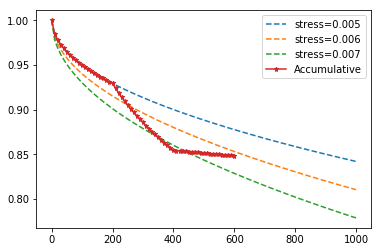

In [60]:
interp_time = np.linspace(0, 1000, 101)
plt.figure()
for stress in [0.005, 0.006, 0.007]:
    interp_capacity = cal_capacity(interp_time, stress)
    plt.plot(interp_time, interp_capacity, '--', label='stress={}'.format(stress))

plt.plot(*aggregated_capacity(acc_stress), '*-', markersize=5, label='Accumulative')
plt.legend()
plt.show()

In [27]:
def fun(x):
    if x >=0:
        return x**2
    else:
        return x

In [34]:
x_all = np.linspace(-5, 5, 100)
y = np.array([fun(x) for x in x_all])
xval = 12
np.interp(xval, y, x_all)

3.4638591800356506

In [35]:
3.46 ** 2

11.9716

In [52]:
f(40)

array(1611.11111111)

In [57]:
x = np.linspace(0, 100, 101)

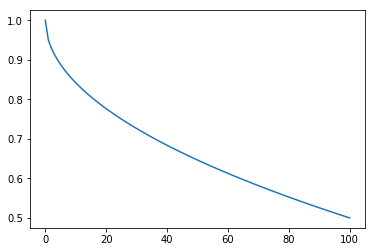

In [64]:
plt.figure()
plt.plot(x, cap(x))